# TRIAL and ERROR

Enter the SA Value: 89


Grade Ranges:

AA Grade: Greater than 89 upto 100
AB Grade: 81 to 89
BB Grade: 72 to 80
BC Grade: 63 to 71
CC Grade: 54 to 62
CD Grade: 45 to 53
DD Grade: 40 to 44
FF Grade: Less than 40



   Marks Grade
0     73    BB
1     82    AB
2     85    AB
3     89    AB
4     72    BB





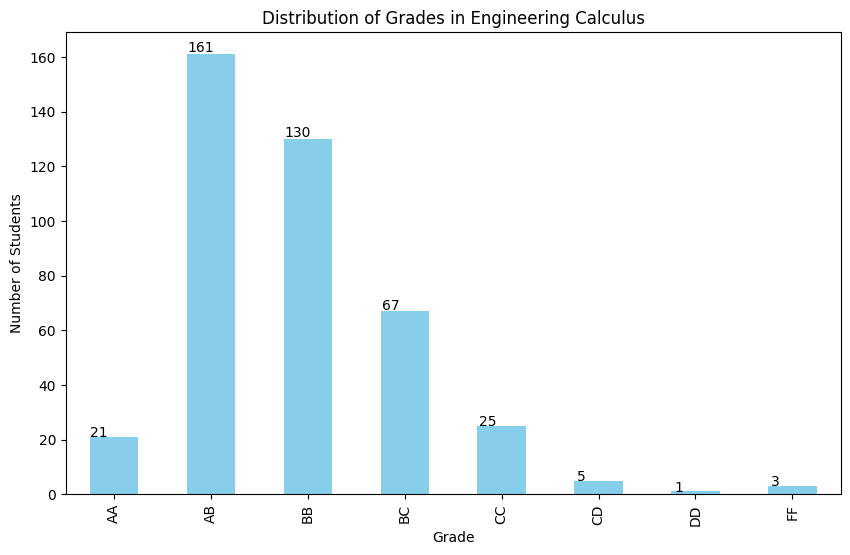

In [7]:
import pandas as pd
import math
import matplotlib.pyplot as plt

def calculate_grade_ranges(SA, Span, median):
    # AA Grade
    AA_range = f"Greater than {SA} upto 100"

    # AB Grade
    AB_start = SA - Span + 1
    AB_range = f"{AB_start} to {SA}"

    # BB Grade
    BB_start = SA - 2*Span + 1
    BB_end = SA - Span
    BB_range = f"{BB_start} to {BB_end}"

    # BC Grade
    BC_start = SA - 3*Span + 1
    BC_end = SA - 2*Span
    BC_range = f"{BC_start} to {BC_end}"

    # CC Grade
    CC_start = SA - 4*Span + 1
    CC_end = SA - 3*Span
    CC_range = f"{CC_start} to {CC_end}"

    # CD Grade
    CD_start = SA - 5*Span + 1
    CD_end = SA - 4*Span
    CD_range = f"{CD_start} to {CD_end}"

    # DD Grade
    median = math.ceil(median)
    DD_start = median / 2 if median&1 == 0 else (median + 1) / 2
    DD_end = SA - 5*Span
    DD_range = f"{int(DD_start)} to {CD_start - 1}"

    # FF Grade
    FF_range = f"Less than {int(DD_start)}"

    # Print the ranges
    print("\n\nGrade Ranges:\n")
    print(f"AA Grade: {AA_range}")
    print(f"AB Grade: {AB_range}")
    print(f"BB Grade: {BB_range}")
    print(f"BC Grade: {BC_range}")
    print(f"CC Grade: {CC_range}")
    print(f"CD Grade: {CD_range}")
    print(f"DD Grade: {DD_range}")
    print(f"FF Grade: {FF_range}")

def categorize_marks(mark, SA, Span, median):
    if mark > SA:
        return "AA"
    elif SA - Span + 1 <= mark <= SA:
        return "AB"
    elif SA - 2 * Span + 1 <= mark <= SA - Span:
        return "BB"
    elif SA - 3 * Span + 1 <= mark <= SA - 2 * Span:
        return "BC"
    elif SA - 4 * Span + 1 <= mark <= SA - 3 * Span:
        return "CC"
    elif SA - 5 * Span + 1 <= mark <= SA - 4 * Span:
        return "CD"
    elif mark >= (median / 2 if median % 2 == 0 else (median + 1) / 2):
        return "DD"
    else:
        return "FF"

df = pd.read_csv('/content/PSIPL_Marks.csv')

sa_value = int(input('Enter the SA Value: '))
span = 9
median = df['Marks'].median()

df['Grade'] = df['Marks'].apply(lambda x: categorize_marks(x, sa_value, span, median))

calculate_grade_ranges(sa_value, span, median)

print("\n\n")
print(df.head())
print("\n\n")

plt.figure(figsize=(10, 6))
grade_counts = df['Grade'].value_counts().sort_index()
ax = grade_counts.plot(kind='bar', color='skyblue')

plt.title('Distribution of Grades in Engineering Calculus')
plt.xlabel('Grade')
plt.ylabel('Number of Students')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


Best SA value: 96

Grade Ranges for the best distribution:

AA Grade: Greater than 96 upto 100
AB Grade: 88 to 96
BB Grade: 79 to 87
BC Grade: 70 to 78
CC Grade: 61 to 69
CD Grade: 52 to 60
DD Grade: 34 to 51
FF Grade: Less than 34




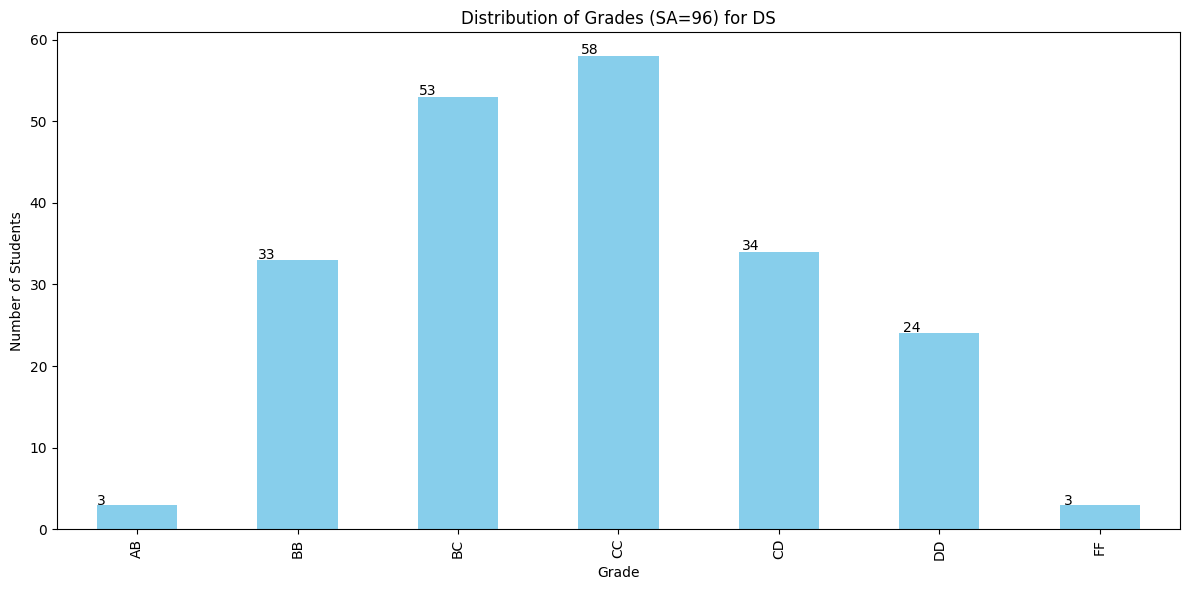

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_grade_ranges(SA, Span, median):
    # AA Grade
    AA_range = f"Greater than {SA} upto 100"

    # AB Grade
    AB_start = SA - Span + 1
    AB_range = f"{AB_start} to {SA}"

    # BB Grade
    BB_start = SA - 2*Span + 1
    BB_end = SA - Span
    BB_range = f"{BB_start} to {BB_end}"

    # BC Grade
    BC_start = SA - 3*Span + 1
    BC_end = SA - 2*Span
    BC_range = f"{BC_start} to {BC_end}"

    # CC Grade
    CC_start = SA - 4*Span + 1
    CC_end = SA - 3*Span
    CC_range = f"{CC_start} to {CC_end}"

    # CD Grade
    CD_start = SA - 5*Span + 1
    CD_end = SA - 4*Span
    CD_range = f"{CD_start} to {CD_end}"

    # DD Grade
    median = np.ceil(median)
    DD_start = median / 2 if median % 2 == 0 else (median + 1) / 2
    DD_end = SA - 5*Span
    DD_range = f"{int(DD_start)} to {CD_start - 1}"

    # FF Grade
    FF_range = f"Less than {int(DD_start)}"

    return {
        'AA': AA_range, 'AB': AB_range, 'BB': BB_range, 'BC': BC_range,
        'CC': CC_range, 'CD': CD_range, 'DD': DD_range, 'FF': FF_range
    }

def categorize_marks(mark, SA, Span, median):
    if mark > SA:
        return "AA"
    elif SA - Span + 1 <= mark <= SA:
        return "AB"
    elif SA - 2 * Span + 1 <= mark <= SA - Span:
        return "BB"
    elif SA - 3 * Span + 1 <= mark <= SA - 2 * Span:
        return "BC"
    elif SA - 4 * Span + 1 <= mark <= SA - 3 * Span:
        return "CC"
    elif SA - 5 * Span + 1 <= mark <= SA - 4 * Span:
        return "CD"
    elif mark >= (median / 2 if median % 2 == 0 else (median + 1) / 2):
        return "DD"
    else:
        return "FF"

def calculate_normality(grade_counts):
    grade_values = {'FF': 1, 'DD': 2, 'CD': 3, 'CC': 4, 'BC': 5, 'BB': 6, 'AB': 7, 'AA': 8}
    numerical_data = []
    for grade, count in grade_counts.items():
        numerical_data.extend([grade_values[grade]] * count)

    if len(set(numerical_data)) == 1:
        return 0

    _, p_value = stats.shapiro(numerical_data)

    return p_value

def analyze_distributions(df, span=9):
    median = df['Marks'].median()
    best_sa = None
    best_p_value = 0
    best_grade_counts = None

    for sa in range(1, 101):
        df['Grade'] = df['Marks'].apply(lambda x: categorize_marks(x, sa, span, median))
        grade_counts = df['Grade'].value_counts().sort_index()

        p_value = calculate_normality(grade_counts)

        if p_value > best_p_value:
            best_p_value = p_value
            best_sa = sa
            best_grade_counts = grade_counts

    return best_sa, best_p_value, best_grade_counts

def plot_best_distribution(best_sa, best_grade_counts, best_p_value, subject_name):
    plt.figure(figsize=(12, 6))
    ax = best_grade_counts.plot(kind='bar', color='skyblue')

    plt.title(f'Distribution of Grades (SA={best_sa}) for {subject_name}')
    plt.xlabel('Grade')
    plt.ylabel('Number of Students')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()

# Main execution
path = '/content/DS_Marks.csv'
subject_name = path.split('/')[2].split('_')[0]

df = pd.read_csv(path)

best_sa, best_p_value, best_grade_counts = analyze_distributions(df)

print(f"\nBest SA value: {best_sa}")

print("\nGrade Ranges for the best distribution:\n")
best_ranges = calculate_grade_ranges(best_sa, 9, df['Marks'].median())
for grade, range_str in best_ranges.items():
    print(f"{grade} Grade: {range_str}")

print("\n")
plot_best_distribution(best_sa, best_grade_counts, best_p_value, subject_name)

# DO NOT EDIT CODES ABOVE



Best SA value: 70

Grade Ranges for the best distribution:

AA Grade: Greater than 70 upto 100
AB Grade: 62 to 70
BB Grade: 53 to 61
BC Grade: 44 to 52
CC Grade: 35 to 43
CD Grade: 26 to 34
DD Grade: 40 to 25
FF Grade: Less than 40




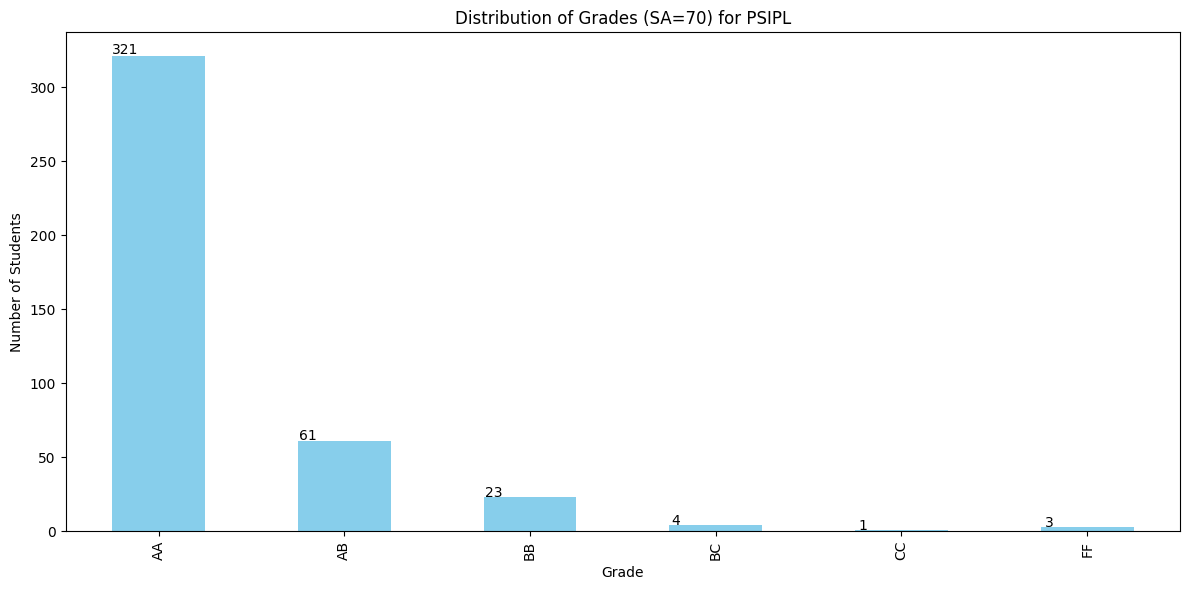


Best SA value: 80

Grade Ranges for the best distribution:

AA Grade: Greater than 80 upto 100
AB Grade: 72 to 80
BB Grade: 63 to 71
BC Grade: 54 to 62
CC Grade: 45 to 53
CD Grade: 36 to 44
DD Grade: 40 to 35
FF Grade: Less than 40




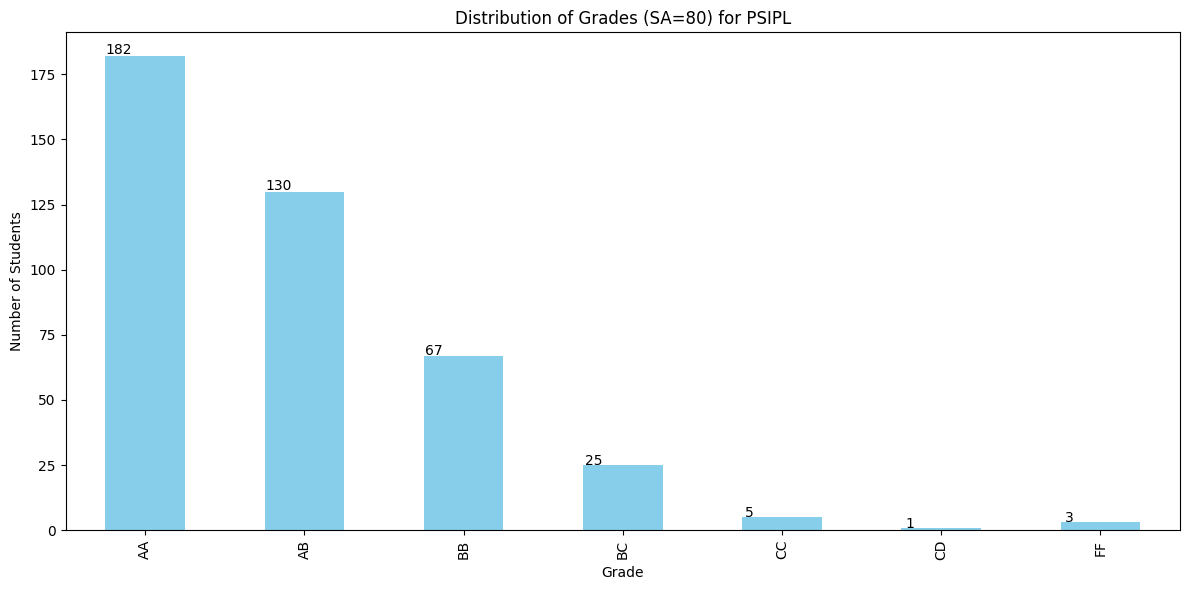


Best SA value: 88

Grade Ranges for the best distribution:

AA Grade: Greater than 88 upto 100
AB Grade: 80 to 88
BB Grade: 71 to 79
BC Grade: 62 to 70
CC Grade: 53 to 61
CD Grade: 44 to 52
DD Grade: 40 to 43
FF Grade: Less than 40




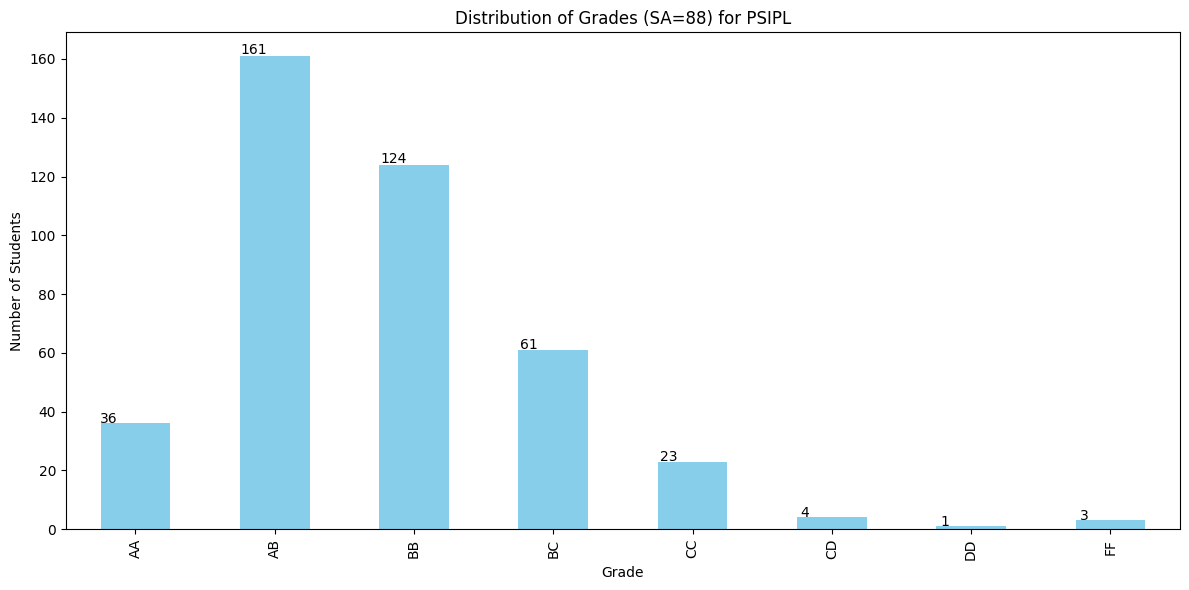


Best SA value: 96

Grade Ranges for the best distribution:

AA Grade: Greater than 96 upto 100
AB Grade: 88 to 96
BB Grade: 79 to 87
BC Grade: 70 to 78
CC Grade: 61 to 69
CD Grade: 52 to 60
DD Grade: 40 to 51
FF Grade: Less than 40




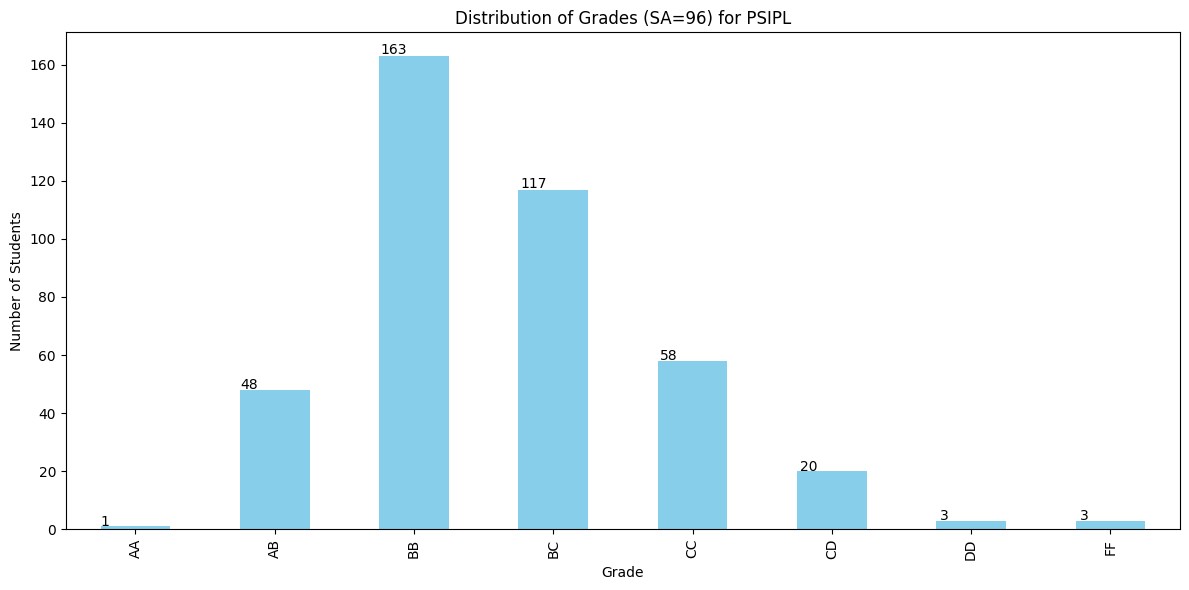

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def calculate_grade_ranges(SA, Span, median):
    AA_range = f"Greater than {SA} upto 100"
    AB_start = SA - Span + 1
    AB_range = f"{AB_start} to {SA}"
    BB_start = SA - 2 * Span + 1
    BB_end = SA - Span
    BB_range = f"{BB_start} to {BB_end}"
    BC_start = SA - 3 * Span + 1
    BC_end = SA - 2 * Span
    BC_range = f"{BC_start} to {BC_end}"
    CC_start = SA - 4 * Span + 1
    CC_end = SA - 3 * Span
    CC_range = f"{CC_start} to {CC_end}"
    CD_start = SA - 5 * Span + 1
    CD_end = SA - 4 * Span
    CD_range = f"{CD_start} to {CD_end}"
    median = np.ceil(median)
    DD_start = median / 2 if median % 2 == 0 else (median + 1) / 2
    DD_end = SA - 5 * Span
    DD_range = f"{int(DD_start)} to {CD_start - 1}"
    FF_range = f"Less than {int(DD_start)}"

    return {
        'AA': AA_range, 'AB': AB_range, 'BB': BB_range, 'BC': BC_range,
        'CC': CC_range, 'CD': CD_range, 'DD': DD_range, 'FF': FF_range
    }

def categorize_marks(mark, SA, Span, median):
    if mark > SA:
        return "AA"
    elif SA - Span + 1 <= mark <= SA:
        return "AB"
    elif SA - 2 * Span + 1 <= mark <= SA - Span:
        return "BB"
    elif SA - 3 * Span + 1 <= mark <= SA - 2 * Span:
        return "BC"
    elif SA - 4 * Span + 1 <= mark <= SA - 3 * Span:
        return "CC"
    elif SA - 5 * Span + 1 <= mark <= SA - 4 * Span:
        return "CD"
    elif mark >= (median / 2 if median % 2 == 0 else (median + 1) / 2):
        return "DD"
    else:
        return "FF"

def calculate_normality(grade_counts):
    grade_values = {'FF': 1, 'DD': 2, 'CD': 3, 'CC': 4, 'BC': 5, 'BB': 6, 'AB': 7, 'AA': 8}
    numerical_data = []
    for grade, count in grade_counts.items():
        numerical_data.extend([grade_values[grade]] * count)

    if len(set(numerical_data)) == 1:
        return 0

    _, p_value = stats.shapiro(numerical_data)

    return p_value

def analyze_distributions(df, st, en, span):
    median = df['Marks'].median()
    best_sa = None
    best_p_value = 0
    best_grade_counts = None

    for sa in range(st, en):
        df['Grade'] = df['Marks'].apply(lambda x: categorize_marks(x, sa, span, median))
        grade_counts = df['Grade'].value_counts().sort_index()

        p_value = calculate_normality(grade_counts)

        if p_value > best_p_value:
            best_p_value = p_value
            best_sa = sa
            best_grade_counts = grade_counts

    return best_sa, best_p_value, best_grade_counts

def plot_best_distribution(best_sa, best_grade_counts, best_p_value, subject_name):
    plt.figure(figsize=(12, 6))
    ax = best_grade_counts.plot(kind='bar', color='skyblue')

    plt.title(f'Distribution of Grades (SA={best_sa}) for {subject_name}')
    plt.xlabel('Grade')
    plt.ylabel('Number of Students')

    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

    plt.tight_layout()
    plt.show()

path = '/content/PSIPL_Marks.csv'
subject_name = path.split('/')[2].split('_')[0]

df = pd.read_csv(path)

sa_ranges = [[60, 71], [70, 81], [80, 91], [90, 101]]

for st, en in sa_ranges:
    best_sa, best_p_value, best_grade_counts = analyze_distributions(df, st, en, 9)

    print(f"\nBest SA value: {best_sa}")

    print("\nGrade Ranges for the best distribution:\n")
    best_ranges = calculate_grade_ranges(best_sa, 9, df['Marks'].median())
    for grade, range_str in best_ranges.items():
        print(f"{grade} Grade: {range_str}")

    print("\n")
    plot_best_distribution(best_sa, best_grade_counts, best_p_value, subject_name)